
# OpenCV Basic Functions – Complete Beginner Reference 📘
## All Essential OpenCV Operations You Must Know

**Level:** Absolute Beginner  
**Goal:** Learn ALL core OpenCV functions used daily

---

## Covered Topics
- Reading & writing images
- Image properties (shape, type, size)
- Copying images
- Color conversions
- Resizing
- Cropping
- Flipping
- Rotating
- Translation
- Drawing
- Pixel access
- Data types

---



## 1. Import Libraries


### Importing Libraries

Imports the required libraries:

- **cv2 (OpenCV):** Used for image processing and computer vision tasks.
- **matplotlib.pyplot:** Used for displaying images and visual results inside the notebook.

These imports are required before performing any image operations.

In [ ]:

import cv2
import numpy as np
import matplotlib.pyplot as plt

print("OpenCV version:", cv2.__version__)


OpenCV version: 4.12.0



## 2. Reading an Image
`cv2.imread()` loads an image as a NumPy array


Uplodaing the image from Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Reading Images from Disk

Reading the images by using `cv2.imread`.

- Different flags are used to load images in **color**, **unchanged**, or **grayscale** modes.
- OpenCV loads color images in **BGR** format by default.

Correct file paths are essential; otherwise, the image will be loaded as `None`.

In [ ]:

img = cv2.imread("/content/drive/MyDrive/ISBI/riva_trackA/images/train/ASCH_1_10.png")

if img is None:
    print("Upload an image named sample.jpg")
else:
    print("Image loaded successfully")


Image loaded successfully



## 3. Image Properties


### Image Properties

Image dimensions using the `shape` attribute.

- Color images return `(height, width, channels)`.
- Grayscale images return `(height, width)`.

This information is important when performing resizing or channel-based operations.

In [ ]:

print("Shape (H, W, C):", img.shape)
print("Height:", img.shape[0])
print("Width:", img.shape[1])
print("Channels:", img.shape[2])
print("Data type:", img.dtype)
print("Total pixels:", img.size)


Shape (H, W, C): (1024, 1024, 3)
Height: 1024
Width: 1024
Channels: 3
Data type: uint8
Total pixels: 3145728



## 4. Display Image (Correct Way)
OpenCV uses BGR → convert to RGB for matplotlib


### Displaying Images

Visualizing the images using Matplotlib.

- `plt.imshow()` is used to display images inside the notebook.
- Color images loaded by OpenCV must be converted from **BGR to RGB** to display correctly.
- Grayscale images are displayed using a single intensity channel.

(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

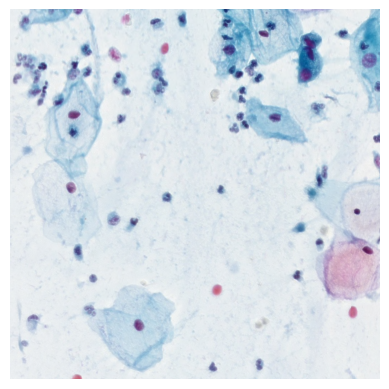

In [ ]:

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis("off")



## 5. Writing (Saving) an Image


The image stored in the variable img is written to disk using cv2.imwrite.

cv2.imwrite(filename, image) saves the image in the specified file format based on the file extension (e.g., .png, .jpg).

Successful execution creates a file on disk that can be accessed or shared outside the Python environment.

The print statement confirms that the save operation has completed successfully, providing immediate feedback in the console.

In [1]:

cv2.imwrite("saved_image.png", img)
print("Image saved")


SyntaxError: invalid syntax (ipython-input-1078148014.py, line 1)


## 6. Copy Image (Very Important)


* Creates a deep copy of the image img, storing it in img_copy.

* Modifications to img_copy will not affect the original img.
* Essential when you need to process or alter an image without changing the original data.

In [ ]:

img_copy = img.copy()


In this code, `draw = img` does not create a new image but merely another reference to the same array.  

When `cv2.rectangle(draw, (50,50), (300,300), (0,0,255), 3)` is used to draw a rectangle, it directly modifies the original image `img` because both `draw` and `img` point to the same data in memory.  

As a result, displaying `img` with `plt.imshow` shows the modified image, even though no explicit copy was made.


(np.float64(-0.5), np.float64(1023.5), np.float64(1023.5), np.float64(-0.5))

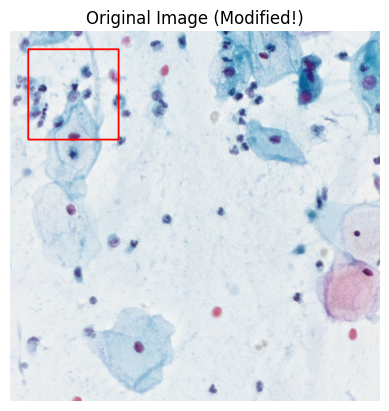

In [ ]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread("/content/drive/MyDrive/ISBI/riva_trackA/images/train/ASCH_1_10.png")

draw = img      # NOT a real copy!

# Draw a rectangle
cv2.rectangle(draw, (50,50), (300,300), (0,0,255), 3)

# Show original image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original Image (Modified!)")
plt.axis("off")



## 7. Convert Color Spaces


### Color Space Conversion

Converts images between color spaces using `cv2.cvtColor`.

- Common conversions include BGR → RGB and BGR → Grayscale.
- Color space conversion is essential for visualization and analysis tasks.

In [ ]:

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
hsv  = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)



## 8. Resize Image


### Resizing Images

Resizes images using `cv2.resize`.

- The new size is provided as `(width, height)`.
- Resizing is commonly used for model input preparation or visualization.

Interpolation methods affect image quality when scaling.

In [ ]:

resized = cv2.resize(img, (300, 300))



## 9. Crop Image


This line crops a region from the image img by slicing the NumPy array. It extracts the pixels from rows 50 to 249 and columns 100 to 349, creating a new image crop that contains only that rectangular portion. The original image img remains unchanged.

In [ ]:

crop = img[50:250, 100:350]



## 10. Flip Image
0 → vertical  
1 → horizontal  
-1 → both


In [ ]:

flip_h = cv2.flip(img, 1)
flip_v = cv2.flip(img, 0)
flip_both = cv2.flip(img, -1)



## 11. Rotate Image


### Image Properties

This cell inspects the image dimensions using the `shape` attribute.

- Color images return `(height, width, channels)`.
- Grayscale images return `(height, width)`.

This information is important when performing resizing or channel-based operations.

In [ ]:

(h, w) = img.shape[:2]
center = (w // 2, h // 2)

M = cv2.getRotationMatrix2D(center, 45, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))



## 12. Translate (Move) Image


`M = np.float32([[1, 0, 50], [0, 1, 100]])` defines the affine transformation matrix, which shifts the image 50 pixels to the right (x-direction) and 100 pixels down (y-direction).  

`cv2.warpAffine(img, M, (w, h))` applies this transformation to `img`, producing `translated` with the same size `(w, h)`.  

The original image `img` remains unchanged. Essentially, this moves the entire image without resizing or rotating it.


In [ ]:

M = np.float32([[1, 0, 50], [0, 1, 100]])
translated = cv2.warpAffine(img, M, (w, h))



## 13. Pixel Access


This code accesses and modifies a specific pixel in the image.  

`pixel = img[100, 200]` retrieves the pixel at row 100, column 200, and prints its current BGR value.  

`img[100, 200] = [0, 0, 255]` sets that pixel to red in BGR format. The change affects only that single pixel, leaving the rest of the image unchanged.


In [ ]:

pixel = img[100, 200]
print("BGR Pixel Value:", pixel)

img[100,200] = [0,0,255]  # set pixel to red


BGR Pixel Value: [230 212 179]



## 14. Drawing Functions


This code demonstrates how to draw shapes and text on an image using OpenCV.  

`draw = img.copy()` creates an independent copy of the original image so that modifications do not affect `img`.  

- `cv2.line(draw, (50,50), (300,50), (0,255,0), 2)` draws a green line from (50,50) to (300,50) with a thickness of 2 pixels.  
- `cv2.rectangle(draw, (50,100), (300,300), (255,0,0), 2)` draws a blue rectangle with the top-left corner at (50,100) and bottom-right corner at (300,300).  
- `cv2.circle(draw, (400,200), 50, (0,0,255), 2)` draws a red circle centered at (400,200) with a radius of 50 pixels.  
- `cv2.putText(draw, "OpenCV", (50,350), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,0), 2)` adds the text "OpenCV" at position (50,350) in yellow with a font size of 1 and thickness of 2.  

This approach allows you to annotate images with lines, shapes, and text while keeping the original image intact.


In [ ]:

draw = img.copy()

cv2.line(draw, (50,50), (300,50), (0,255,0), 2)
cv2.rectangle(draw, (50,100), (300,300), (255,0,0), 2)
cv2.circle(draw, (400,200), 50, (0,0,255), 2)

cv2.putText(draw, "OpenCV",
            (50,350),
            cv2.FONT_HERSHEY_SIMPLEX,
            1,
            (255,255,0),
            2)


array([[[241, 238, 234],
        [244, 241, 237],
        [246, 243, 239],
        ...,
        [214, 191, 145],
        [211, 188, 142],
        [210, 186, 140]],

       [[242, 239, 235],
        [243, 240, 235],
        [243, 240, 235],
        ...,
        [208, 185, 142],
        [208, 184, 140],
        [207, 183, 140]],

       [[243, 240, 236],
        [241, 238, 234],
        [239, 236, 232],
        ...,
        [206, 184, 145],
        [207, 184, 145],
        [209, 186, 147]],

       ...,

       [[241, 238, 234],
        [242, 240, 236],
        [243, 241, 237],
        ...,
        [242, 239, 236],
        [241, 238, 234],
        [241, 238, 234]],

       [[239, 236, 233],
        [240, 238, 234],
        [242, 239, 235],
        ...,
        [241, 238, 235],
        [241, 238, 234],
        [240, 237, 233]],

       [[244, 242, 238],
        [243, 241, 237],
        [242, 240, 236],
        ...,
        [243, 241, 237],
        [241, 238, 234],
        [244, 241, 237]]


## 15. Image Arithmetic


This code adjusts the brightness of an image using OpenCV.  

- `bright = cv2.add(img, 50)` increases the brightness of `img` by adding 50 to all pixel values, making the image lighter.  
- `dark = cv2.subtract(img, 50)` decreases the brightness by subtracting 50 from all pixel values, making the image darker.  

The original image `img` remains unchanged. These operations are applied to all pixels while preserving the image size and color structure.


In [ ]:

bright = cv2.add(img, 50)
dark   = cv2.subtract(img, 50)



## 16. Blending Images


This code blends two images together using OpenCV.  

`alpha = 0.7` sets the weight of the first image `img`, while `1 - alpha` is the weight of the second image `img_copy`.  

`blended = cv2.addWeighted(img, alpha, img_copy, 1-alpha, 0)` computes a weighted sum of the two images, producing `blended`. The `0` at the end specifies no additional scalar is added.  

This technique allows smooth blending or transparency effects between two images, while both original images remain unchanged.


In [ ]:

alpha = 0.7
blended = cv2.addWeighted(img, alpha, img_copy, 1-alpha, 0)



## 17. Data Type Conversion


This code converts an image between `uint8` and normalized floating-point formats.  

`float_img = img.astype(np.float32) / 255.0` converts the original image to `float32` and normalizes pixel values to the range `[0, 1]`, which is often required for certain image processing or deep learning operations.  

`uint8_img = (float_img * 255).astype(np.uint8)` converts the normalized floating-point image back to `uint8` format with pixel values in the range `[0, 255]`, restoring it for standard image display or saving.  

The conversions preserve the original image data while allowing flexible numerical operations.  


In [ ]:

float_img = img.astype(np.float32) / 255.0
uint8_img = (float_img * 255).astype(np.uint8)



## 18. Summary Table 🧠

| Function | Purpose |
|--------|--------|
| imread | Load image |
| imwrite | Save image |
| resize | Resize |
| cvtColor | Color conversion |
| flip | Flip |
| warpAffine | Rotate/Translate |
| shape | Image size |
| dtype | Image type |
| copy | Duplicate |
| add | Brightness |
| addWeighted | Blend |
| line/rectangle/circle | Drawing |

---

## You now know ALL OpenCV BASICS ✅
This is the **foundation of everything** in computer vision.
